In [ ]:
"In the name of Allah, most gracious and most merciful!"

'In the name of Allah, most gracious and most merciful!'

In [ ]:
%cd /content/drive/MyDrive/Formula AI Hack 2022

/content/drive/MyDrive/Formula AI Hack 2022


In [ ]:
#!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download oracledevrel/formulaaihackathon2022
#!unzip formulaaihackathon2022 -d formulaaihack2022

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("formulaaihack2022/weather.csv", low_memory=False)

# Cleaning & Filtering

Our data has many unnecessary features which reduce accuracy score of the model and do not help to improve the model.

In [ ]:
df = df.drop("Unnamed: 58", axis=1)

In [ ]:
unnecessary = []
for j in df.columns:
    if len(df[j].unique()) < 2:
        unnecessary.append(j)

unnecessary.append('M_GAME_MINOR_VERSION')
unnecessary.append('GAMEHOST')
unnecessary.append('M_ZONE_FLAG')
unnecessary.append('M_ZONE_START')
unnecessary

['M_PACKET_FORMAT',
 'M_GAME_MAJOR_VERSION',
 'M_PACKET_VERSION',
 'M_PACKET_ID',
 'M_SECONDARY_PLAYER_CAR_INDEX',
 'M_SLI_PRO_NATIVE_SUPPORT',
 'M_SAFETY_CAR_STATUS',
 'M_GAME_MINOR_VERSION',
 'GAMEHOST',
 'M_ZONE_FLAG',
 'M_ZONE_START']

In [ ]:
df = df.drop(unnecessary, axis=1)

Why we drop 3572327th row?
- It has many missing values

In [ ]:
df = df.drop(3572327)

In [ ]:
zero_forecast = df.loc[df['M_NUM_WEATHER_FORECAST_SAMPLES'] == 0]
zero_forecast.shape

(827211, 47)

In [ ]:
df = df.drop(zero_forecast.index)
df.shape

(2745116, 47)

In [ ]:
UNIQUE_COLUMNS = ['M_SESSION_UID' , 'M_PLAYER_CAR_INDEX', 'TIMESTAMP']

In [ ]:
df.duplicated().sum()

2029411

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(715705, 47)

# MIssing values

In [ ]:
df.isnull().sum()

M_SESSION_UID                                         0
M_SESSION_TIME                                        0
M_FRAME_IDENTIFIER                                    0
M_PLAYER_CAR_INDEX                                    0
M_BRAKING_ASSIST                                      0
M_SESSION_LINK_IDENTIFIER                             0
M_PIT_RELEASE_ASSIST                                  0
TIMESTAMP                                             0
M_PIT_STOP_WINDOW_IDEAL_LAP                           0
M_TRACK_TEMPERATURE                                   0
M_TRACK_LENGTH                                        0
M_GAME_PAUSED                                         0
M_FORECAST_ACCURACY                                   0
M_AIR_TEMPERATURE                                     0
M_NUM_WEATHER_FORECAST_SAMPLES                        0
M_TRACK_ID                                            0
M_ERSASSIST                                           0
M_FORMULA                                       

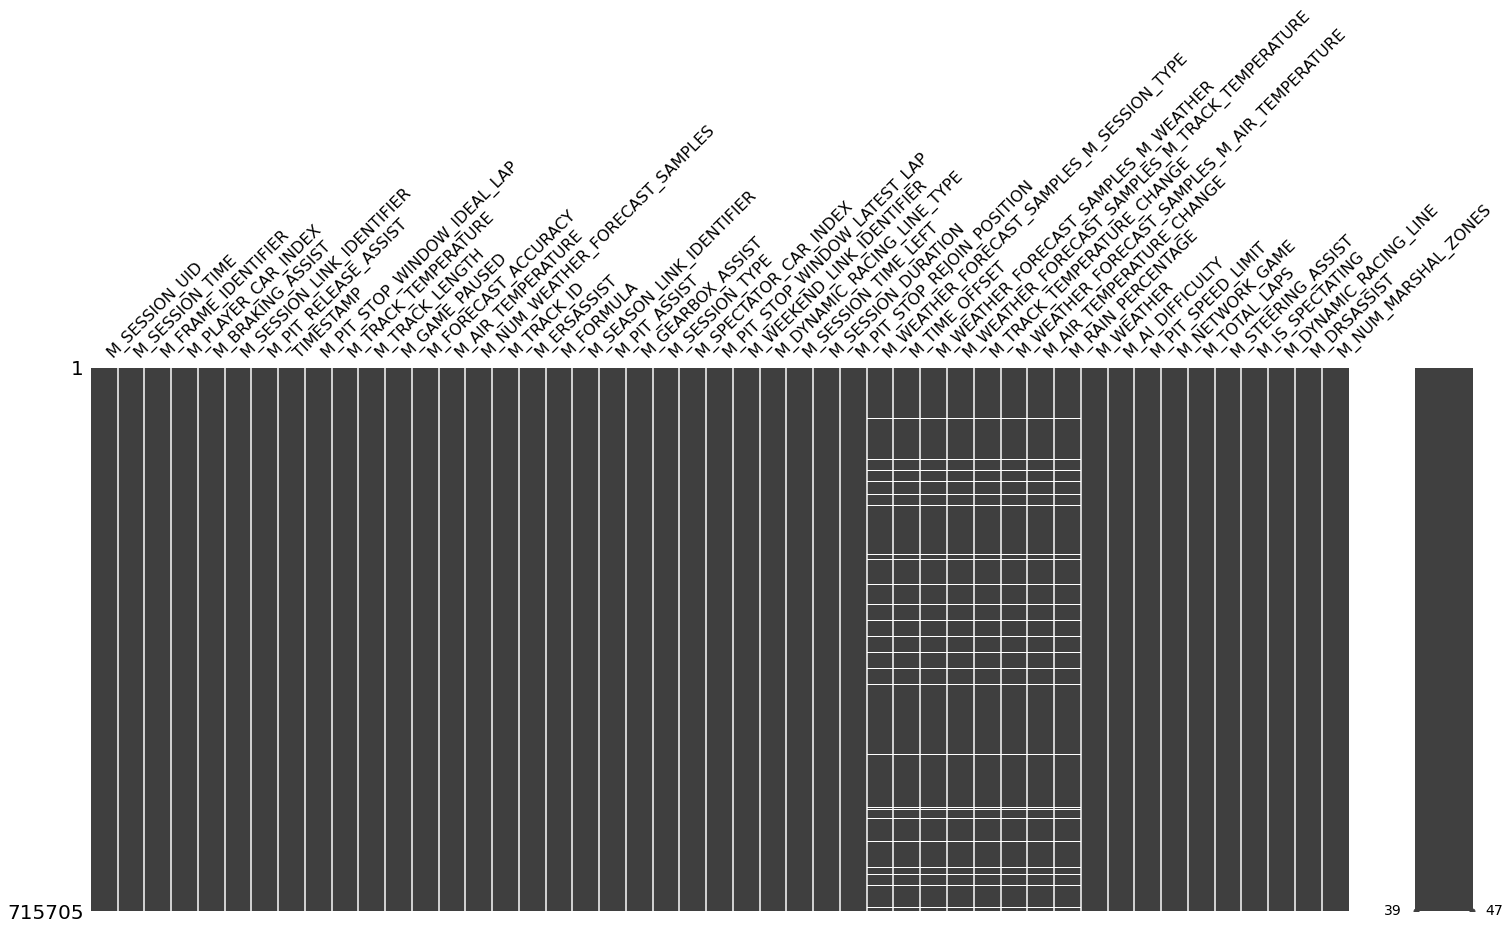

In [57]:
import missingno as msno
msno.matrix(df);

In [ ]:
missing_df = df.loc[df['M_TIME_OFFSET'].isnull()]
clean_df = df.drop(missing_df.index)

In [ ]:
clean_df.shape, missing_df.shape

((680054, 47), (35651, 47))

In [ ]:
clean_df

,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_BRAKING_ASSIST,M_SESSION_LINK_IDENTIFIER,M_PIT_RELEASE_ASSIST,TIMESTAMP,M_PIT_STOP_WINDOW_IDEAL_LAP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_GAME_PAUSED,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_ERSASSIST,M_FORMULA,M_SEASON_LINK_IDENTIFIER,M_PIT_ASSIST,M_GEARBOX_ASSIST,M_SESSION_TYPE,M_SPECTATOR_CAR_INDEX,M_PIT_STOP_WINDOW_LATEST_LAP,M_WEEKEND_LINK_IDENTIFIER,M_DYNAMIC_RACING_LINE_TYPE,M_SESSION_TIME_LEFT,M_SESSION_DURATION,M_PIT_STOP_REJOIN_POSITION,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES
17038,2939734289500381614,65.276,1647,0,0,1553478724,0,1.642724e+09,0,33,4650,0,0,25,10,28,0,0,1553478724,0,1,8,255,0,1553478724,0,1019,1080,0,8.0,0.0,0.0,33.0,2.0,25.0,2.0,1.0,0,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
17039,2939734289500381614,65.276,1647,0,0,1553478724,0,1.642724e+09,0,33,4650,0,0,25,10,28,0,0,1553478724,0,1,8,255,0,1553478724,0,1019,1080,0,8.0,5.0,0.0,33.0,2.0,25.0,2.0,1.0,0,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
17040,2939734289500381614,65.276,1647,0,0,1553478724,0,1.642724e+09,0,33,4650,0,0,25,10,28,0,0,1553478724,0,1,8,255,0,1553478724,0,1019,1080,0,8.0,10.0,0.0,33.0,2.0,25.0,2.0,2.0,0,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
17041,2939734289500381614,65.276,1647,0,0,1553478724,0,1.642724e+09,0,33,4650,0,0,25,10,28,0,0,1553478724,0,1,8,255,0,1553478724,0,1019,1080,0,10.0,0.0,1.0,32.0,1.0,24.0,1.0,5.0,0,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
17042,2939734289500381614,65.276,1647,0,0,1553478724,0,1.642724e+09,0,33,4650,0,0,25,10,28,0,0,1553478724,0,1,8,255,0,1553478724,0,1019,1080,0,10.0,5.0,1.0,32.0,2.0,24.0,2.0,5.0,0,31,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572288,10862815468833217499,683.047,22874,1,0,2756721461,0,1.642288e+09,0,33,4650,0,0,25,10,28,0,0,2756721461,0,1,8,255,0,2756721461,0,396,1080,0,10.0,15.0,0.0,33.0,2.0,25.0,2.0,3.0,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572289,10862815468833217499,683.047,22874,1,0,2756721461,0,1.642288e+09,0,33,4650,0,0,25,10,28,0,0,2756721461,0,1,8,255,0,2756721461,0,396,1080,0,10.0,30.0,0.0,33.0,2.0,25.0,2.0,3.0,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572290,10862815468833217499,683.047,22874,1,0,2756721461,0,1.642288e+09,0,33,4650,0,0,25,10,28,0,0,2756721461,0,1,8,255,0,2756721461,0,396,1080,0,10.0,45.0,0.0,33.0,2.0,25.0,2.0,3.0,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0
3572291,10862815468833217499,683.047,22874,1,0,2756721461,0,1.642288e+09,0,33,4650,0,0,25,10,28,0,0,2756721461,0,1,8,255,0,2756721461,0,396,1080,0,10.0,60.0,0.0,32.0,1.0,25.0,2.0,3.0,0,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0


In [ ]:
unnecessary = []
for j in clean_df.columns:
    if len(clean_df[j].unique()) < 2:
        unnecessary.append(j)
unnecessary

[]

# Visualization of features

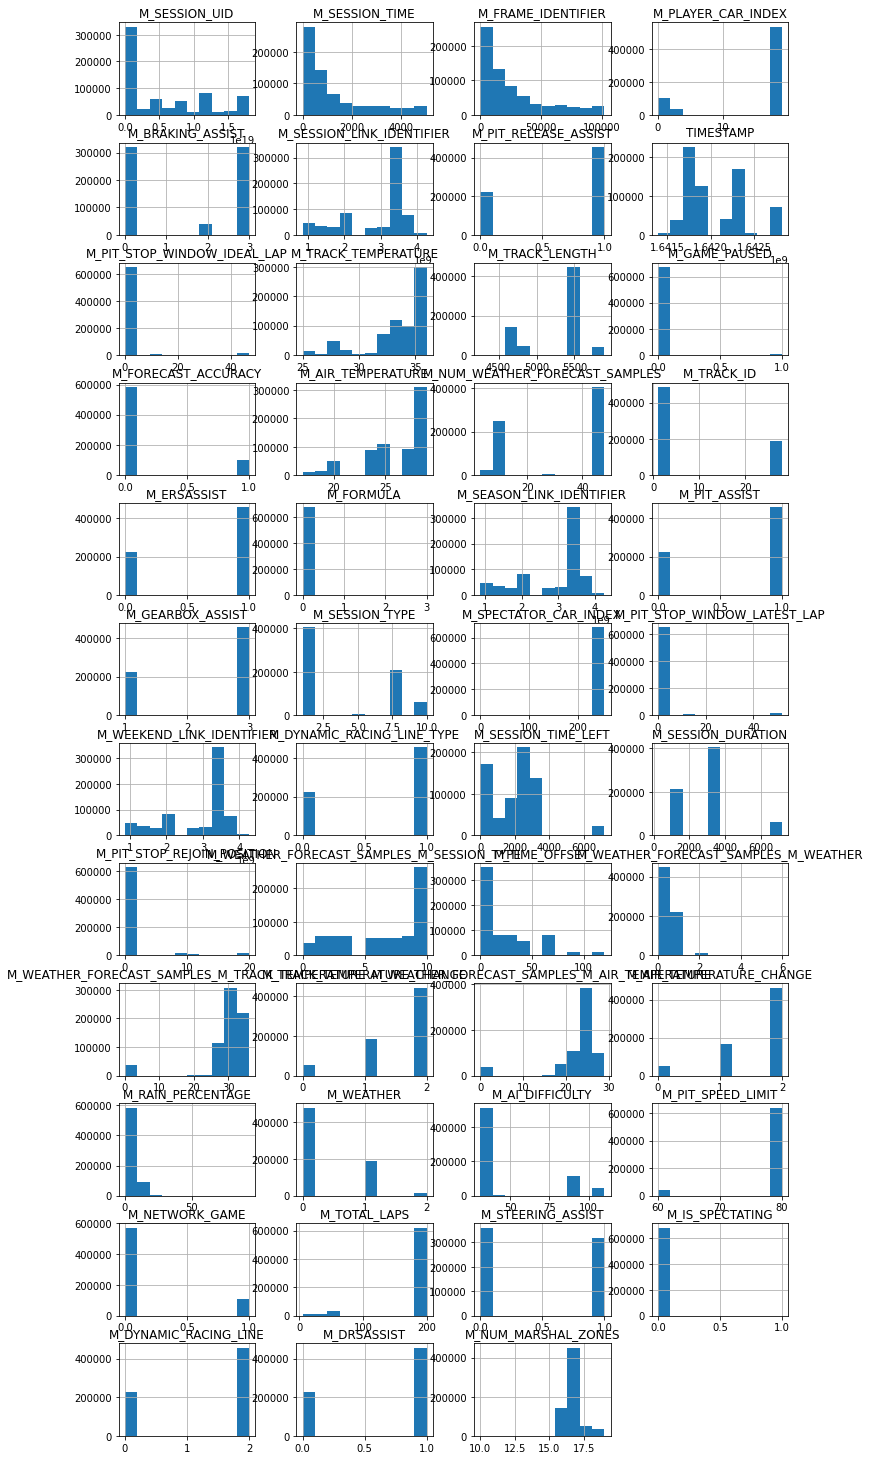

In [ ]:

clean_df.hist(figsize=(12,26), layout=(12, 4))
plt.title("Histogram of features")
plt.show()

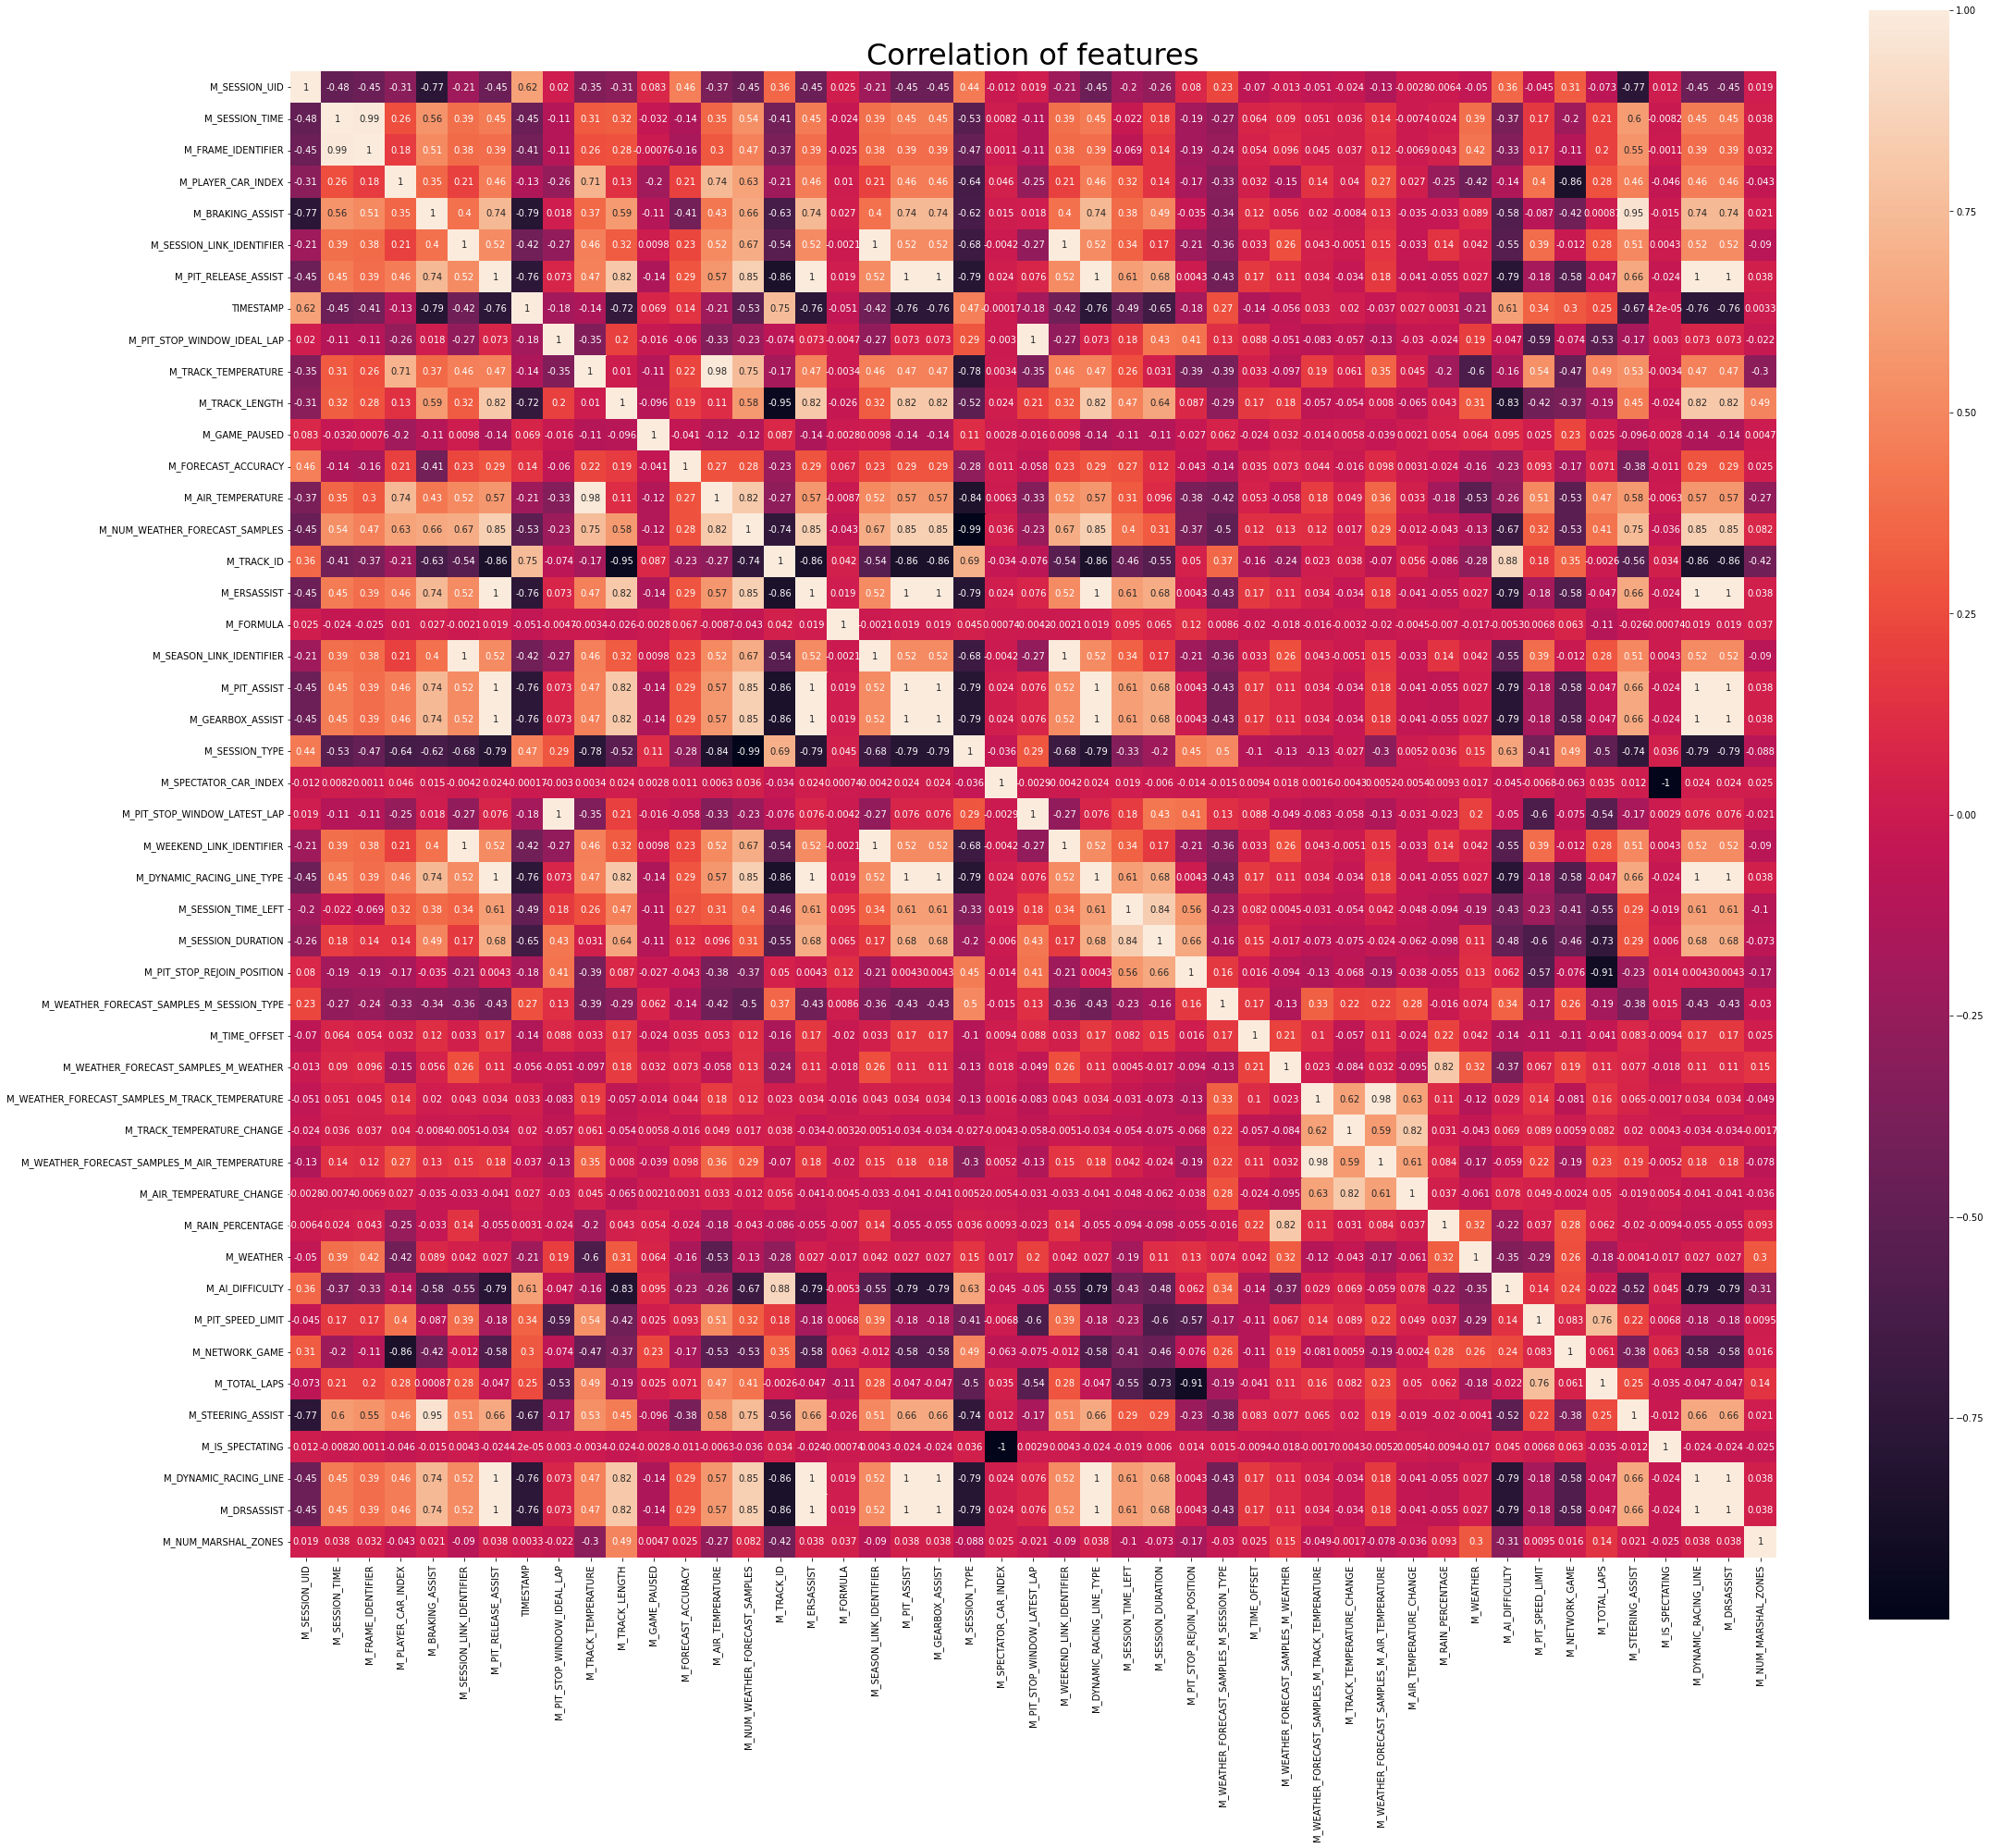

In [ ]:
plt.figure(figsize=(36,32))
plt.title("Correlation of features", fontdict={'fontsize':32})
sns.heatmap(clean_df.corr(), annot=True, square=True)
plt.show()

# Deviding dataset into X & y

In [50]:
weather_y = clean_df['M_WEATHER']
weather_X = clean_df.drop("M_WEATHER", axis=1)
rain_y = clean_df['M_RAIN_PERCENTAGE']
rain_X = clean_df.drop("M_RAIN_PERCENTAGE", axis=1)

# Part 1 | Classification problem
Classifying weather types 

Normalizing the dataset to reduce the effect of differing scales.

In [55]:
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from time import time

pipelines = []
pipelines.append(('NormalizerLDA', Pipeline([('Normalizer', Normalizer()),('LDA',
LinearDiscriminantAnalysis())])))

results = []
names = []
for name, model in pipelines:
    start = time()
    kfold = KFold(n_splits=10, random_state=17, shuffle=True)
    cv_results = cross_val_score(model, weather_X, weather_y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std(), time()-start,"in seconds")
    print(msg)

('NormalizerLDA', 0.9564873041094091, 0.007157868685343149, 69.6181218624115, 'in seconds')


# Finalizing of MLA

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_X, weather_y, random_state=17)

In [60]:
norm = Normalizer().fit(X_train)
rescaledX = norm.transform(X_train)
model = LinearDiscriminantAnalysis()
model.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = norm.transform(X_test)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9519098427188349
[[115773   3826     83]
 [  2788  42989   1136]
 [   335      8   3076]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    119682
           1       0.92      0.92      0.92     46913
           2       0.72      0.90      0.80      3419

    accuracy                           0.95    170014
   macro avg       0.87      0.93      0.90    170014
weighted avg       0.95      0.95      0.95    170014



# Part 2| Regression Problem

Predicting the rain persentage

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
scoring = make_scorer(mean_absolute_error)

Normalizing the dataset to reduce the effect of differing scales.

In [76]:
pipelines = []
pipelines.append(('NormalizerLR', Pipeline([('Normalizer', Normalizer()),('LR',
LinearRegression())])))
pipelines.append(('NormalizerLASSO', Pipeline([('Normalizer', Normalizer()),('LASSO',
Lasso())])))
pipelines.append(('NormalizerEN', Pipeline([('Normalizer', Normalizer()),('EN',
ElasticNet())])))
#pipelines.append(('NormalizerKNN', Pipeline([('Normalizer', Normalizer()),('KNN',
#KNeighborsRegressor())])))
pipelines.append(('NormalizerCART', Pipeline([('Normalizer', Normalizer()),('CART',
DecisionTreeRegressor())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, rain_X, rain_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('NormalizerLR', 5.973630549443685, 7.594258982370882)
('NormalizerLASSO', 3.435279029891073, 0.8309879760938625)
('NormalizerEN', 3.435279029891073, 0.8309879760938625)
('NormalizerCART', 3.435279029891073, 0.8309879760938625)


# Hyperparams tuning 

In [77]:
model = DecisionTreeRegressor()

g_cv = GridSearchCV(model,
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
g_cv.fit(rain_X, rain_y)
print(g_cv.best_params_)

{'min_samples_split': 8}


# Finalizing Decision Tree Regressor

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rain_X, rain_y, random_state=17)

In [78]:


norm = Normalizer().fit(X_train)
rescaledX = norm.transform(X_train)
model = DecisionTreeRegressor(min_samples_split=8)
model.fit(rescaledX, y_train)

rescaledValidationX = norm.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_absolute_error(y_test, predictions))

3.399039691940394


# Summary
We have selected those two MLAs because their evaluation scores are higher than other sklearn algorithm.

